## Table of Contents
* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Importing Data](#2.-Importing-Data)
* [3. Task](#3.-Task)
    * [Step 2 - Security Implications](#Step-2---Security-Implications)
    * [Step 3 - Regional Segmentation](#Step-3---Regional-Segmentation)
    * [Step 4 - Excluding Low-Activity Customers](#Step-4---Excluding-Low-Activity-Customers)
    * [Step 5 - Customer Profile](#Step-5---Customer-Profile)
        * [Age Profile](#Age-Profile)
        * [Income Profile](#Income-Profile)
        * [Number of Dependants Porfile](#Number-of-Dependants-Profile)
        * [Goods](#Goods)
    * [Step 5 Cont - Customer Profile Visualizations](#Step-5-Cont---Customer-Profile-Visualizations)
    * [Step 7 - Aggregations](#Step-7---Aggregations)
* [4. Exporting Data](#4.-Exporting-Dataframe)

## 1. Importing Libraries

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## 2. Importing Data

In [10]:
# Creating a reusable path to my data

path = r'C:\Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 4 07-2023 Instacart Basket Analysis'

In [11]:
# Importing orders_products_all

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [12]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,user_id,order_id,order_number,order_day_of_week,order_hour_of_day,...,name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.800781,138,3139998,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.800781,138,1977647,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.000000,138,3160996,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.000000,138,2254091,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.898438,138,505689,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In [13]:
df.shape

(32404859, 34)

## 3. Task

### Step 2 - Security Implications

In [14]:
# Due to security reasons, dropping name and surname columns

df = df.drop(columns = ['name', 'surname'])

In [15]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'user_id', 'order_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'ind', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'days_since_prior_order_median', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', '_merge'],
      dtype='object')

### Step 3 - Regional Segmentation
1. Create a regional segmentation of the data.
2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [16]:
# Creating a region flag variable

df.loc[df['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
df.loc[df['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
df.loc[df['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
df.loc[df['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [17]:
df['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [18]:
# Creating a crosstab between the regions and the spending flag

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False, normalize = 'index')

In [19]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,0.003852,0.996148
Northeast,0.003258,0.996742
South,0.003759,0.996241
West,0.003765,0.996235


In [20]:
#Creating a color set for vizualizations

colors = ['#6C97B9', '#BF9CAE', '#F2D997', '#8EB897', '#B7C3F3', '#4F6272']

In [21]:
# Copying crosstab to paste it to Excel

crosstab.to_clipboard()

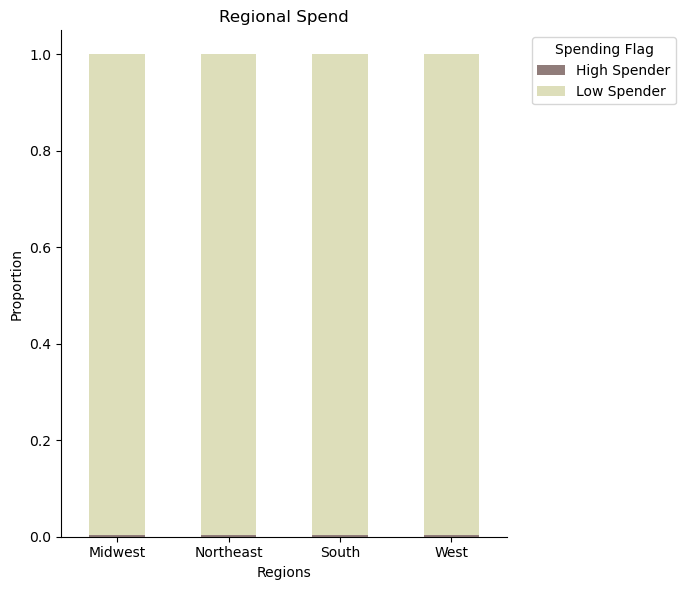

In [55]:
# Plotting the crosstabed regions and spending flag

bar_regions_spend_flag = crosstab.plot(kind='bar', stacked = True, title='Regional Spend', color = colors, figsize=(7, 6))
plt.xlabel('Regions')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

plt.legend(title='Spending Flag', bbox_to_anchor=(1.04, 1)) # Move the legend inside the plot to the lower right corner

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

### Comment

The chart above indicates that after normalizing the figures, there is no significant difference between regions in terms of the spending flag.

In [56]:
# Export the bar chart 

bar_regions_spend_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending_flag.png'))

### Step 4 - Excluding Low-Activity Customers

Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [24]:
# Creating an exclusion flag with loc function

df.loc[df['order_number'] < 5, 'exclusion_flag'] = 'Yes'
df.loc[df['order_number'] >= 5, 'exclusion_flag'] = 'No'

In [25]:
# Checking counts

df['exclusion_flag'].value_counts(dropna = False)

No     24414877
Yes     7989982
Name: exclusion_flag, dtype: int64

In [26]:
# Creating a df from the high activity customers

high_activity_customers = df[df['exclusion_flag'] == 'No']

In [27]:
high_activity_customers.head()

,product_id,product_name,aisle_id,department_id,prices,user_id,order_id,order_number,order_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.800781,138,3139998,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
1,1,Chocolate Sandwich Cookies,61,19,5.800781,138,1977647,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
3,907,Premium Sliced Bacon,106,12,20.000000,138,2254091,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
4,1000,Apricots,18,10,12.898438,138,505689,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No
5,3265,Mini Seedless Watermelon Pack,32,4,1.700195,138,960220,17,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,No


### Step 5 - Customer Profile

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Age Profile

In [28]:
# Creating a colum 'age_profile'

high_activity_customers.loc[high_activity_customers['age'] <35, 'age_profile'] = 'Young Adult'
high_activity_customers.loc[(high_activity_customers['age'] >= 35) & (high_activity_customers['age'] <65), 'age_profile'] = 'Middle Aged'
high_activity_customers.loc[high_activity_customers['age'] >= 65, 'age_profile'] = 'Senior'    

C:\Users\vaiva\AppData\Local\Temp\ipykernel_5768\2307726717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['age'] <35, 'age_profile'] = 'Young Adult'


In [29]:
high_activity_customers['age_profile'].value_counts()

Middle Aged    11455986
Young Adult     6500441
Senior          6458450
Name: age_profile, dtype: int64

### Income Profile

In [30]:
# Checking simple descriptive statistics for the variable

high_activity_customers['income'].describe().astype(int)

count    24414877
mean        99895
std         43333
min         25903
25%         67524
50%         96836
75%        128160
max        593901
Name: income, dtype: int32

In [31]:
# Creating a column 'income_profile'

high_activity_customers.loc[high_activity_customers['income'] <60000, 'income_profile'] = 'Low'
high_activity_customers.loc[(high_activity_customers['income'] >= 60000) & (high_activity_customers['income'] <120000), 'income_profile'] = 'Average'
high_activity_customers.loc[high_activity_customers['income'] >= 120000, 'income_profile'] = 'High'    

C:\Users\vaiva\AppData\Local\Temp\ipykernel_5768\1265419131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['income'] <60000, 'income_profile'] = 'Low'


In [32]:
high_activity_customers['income_profile'].value_counts()

Average    12648553
High        7251387
Low         4514937
Name: income_profile, dtype: int64

### Number of Dependants Profile

In [33]:
# Creating a column 'dependants_profile'

high_activity_customers.loc[high_activity_customers['n_dependants'] == 0, 'dependants_profile'] = 'Single Household'
high_activity_customers.loc[high_activity_customers['n_dependants'] > 0, 'dependants_profile'] = 'Multiple People Household'  

C:\Users\vaiva\AppData\Local\Temp\ipykernel_5768\504046715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['n_dependants'] == 0, 'dependants_profile'] = 'Single Household'


In [34]:
high_activity_customers['dependants_profile'].value_counts(dropna = False)

Multiple People Household    18309875
Single Household              6105002
Name: dependants_profile, dtype: int64

### Goods

In [35]:
# Inserting a new column with department names

high_activity_customers.loc[high_activity_customers['department_id'] == 1, 'department_name'] = 'frozen'
high_activity_customers.loc[high_activity_customers['department_id'] == 2, 'department_name'] = 'other'
high_activity_customers.loc[high_activity_customers['department_id'] == 3, 'department_name'] = 'bakery'
high_activity_customers.loc[high_activity_customers['department_id'] == 4, 'department_name'] = 'produce'
high_activity_customers.loc[high_activity_customers['department_id'] == 5, 'department_name'] = 'alcohol'
high_activity_customers.loc[high_activity_customers['department_id'] == 6, 'department_name'] = 'international'
high_activity_customers.loc[high_activity_customers['department_id'] == 7, 'department_name'] = 'beverages'
high_activity_customers.loc[high_activity_customers['department_id'] == 8, 'department_name'] = 'pets'
high_activity_customers.loc[high_activity_customers['department_id'] == 9, 'department_name'] = 'dry goods pasta'
high_activity_customers.loc[high_activity_customers['department_id'] == 10, 'department_name'] = 'bulk'
high_activity_customers.loc[high_activity_customers['department_id'] == 11, 'department_name'] = 'personal care'
high_activity_customers.loc[high_activity_customers['department_id'] == 12, 'department_name'] = 'meat seafood'
high_activity_customers.loc[high_activity_customers['department_id'] == 13, 'department_name'] = 'pantry'
high_activity_customers.loc[high_activity_customers['department_id'] == 14, 'department_name'] = 'breakfast'
high_activity_customers.loc[high_activity_customers['department_id'] == 15, 'department_name'] = 'canned goods'
high_activity_customers.loc[high_activity_customers['department_id'] == 16, 'department_name'] = 'dairy eggs'
high_activity_customers.loc[high_activity_customers['department_id'] == 17, 'department_name'] = 'household'
high_activity_customers.loc[high_activity_customers['department_id'] == 18, 'department_name'] = 'babies'
high_activity_customers.loc[high_activity_customers['department_id'] == 19, 'department_name'] = 'snacks'
high_activity_customers.loc[high_activity_customers['department_id'] == 20, 'department_name'] = 'deli'
high_activity_customers.loc[high_activity_customers['department_id'] == 21, 'department_name'] = 'missing'

C:\Users\vaiva\AppData\Local\Temp\ipykernel_5768\1665096088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers.loc[high_activity_customers['department_id'] == 1, 'department_name'] = 'frozen'


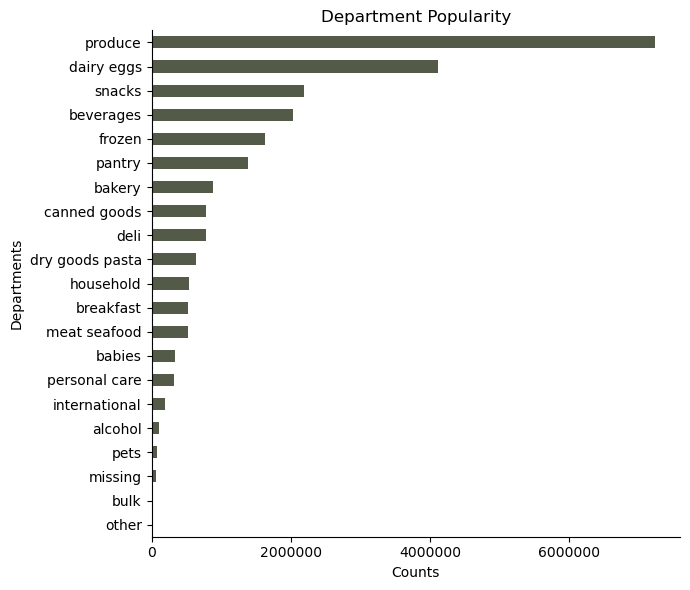

In [36]:
# Plotting a bar graph for department counts

bar_dep = high_activity_customers['department_name'].value_counts(dropna = False).sort_values(ascending=True).plot.barh(color = ['#535B48'], title = 'Department Popularity', figsize=(7, 6))

plt.xlabel('Counts')
plt.ylabel('Departments')

# Customize the X-axis labels to display full integers
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Set the number of major ticks on the X-axis
plt.locator_params(axis='x', nbins=4)

# Remove the right and top lines of the chart
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()  # Ensures all elements fit within the figure area

plt.show()

In [37]:
# Export department counts bar chart
bar_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_counts.png'))

### Step 5 Cont - Customer Profile Visualizations

In [38]:
#Creating a color set for vizualizations

colors = ['#907C7A','#DDDEBA', '#ADA8BE', '#A28497', '#727E63']

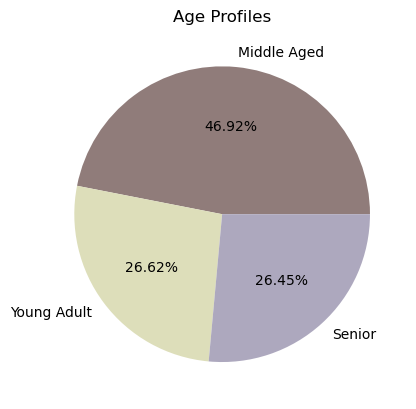

In [39]:
# Age Profile pie chart

pie_age = high_activity_customers['age_profile'].value_counts(dropna = False).plot.pie(autopct = "%.2f%%", colors = colors, ylabel='', title = 'Age Profiles')

In [40]:
# Export Age Profiles Pie chart
pie_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_profiles.png'))

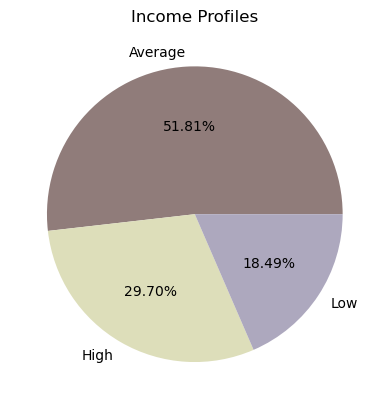

In [41]:
# Income Profile pie chart

pie_inc = high_activity_customers['income_profile'].value_counts(dropna = False).plot.pie(autopct = "%.2f%%", colors = colors, ylabel='', title = 'Income Profiles')

In [42]:
# Export Income Profiles Pie chart

pie_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_profiles.png'))

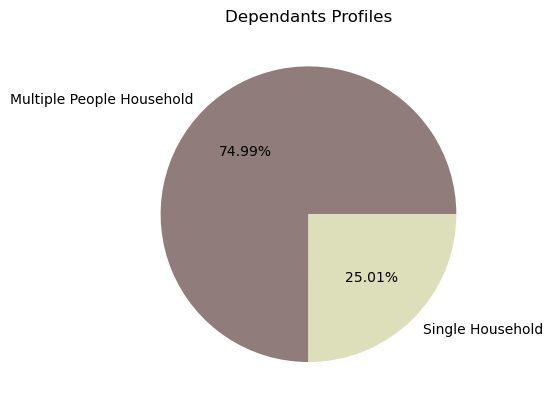

In [43]:
# Income Profile pie chart

pie_dependants = high_activity_customers['dependants_profile'].value_counts(dropna = False).plot.pie(autopct = "%.2f%%", colors = colors, ylabel='', title = 'Dependants Profiles')

In [44]:
# Export Dependant Profiles Pie chart

pie_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependants_profiles.png'))

### Step 7 - Aggregations 

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [45]:
# Age Profile Aggregations by frequency and spending

grouped_age_profile = high_activity_customers.groupby('age_profile').agg(
                        {'days_since_prior_order':['max', 'mean', 'min'], 
                         'prices': ['max', 'mean', 'min']})

In [46]:
# Changing column names 

grouped_age_profile.columns = ['frequency_max', 'frequency_mean', 'frequency_min', 'spending_max', 'spending_mean', 'spending_min']

In [47]:
grouped_age_profile

,frequency_max,frequency_mean,frequency_min,spending_max,spending_mean,spending_min
age_profile,,,,,,
Middle Aged,30.0,10.078820,0.0,25.0,7.789686,1.0
Senior,30.0,10.077181,0.0,25.0,7.795415,1.0
Young Adult,30.0,10.104539,0.0,25.0,7.784873,1.0


In [48]:
# Income Profile Aggregations

grouped_income_profile = high_activity_customers.groupby('income_profile').agg(
                        {'days_since_prior_order':['max', 'mean', 'min'], 
                         'prices': ['max', 'mean', 'min']})

In [49]:
# Changing column names

grouped_income_profile.columns = ['frequency_max', 'frequency_mean', 'frequency_min', 'spending_max', 'spending_mean', 'spending_min']

In [50]:
grouped_income_profile

,frequency_max,frequency_mean,frequency_min,spending_max,spending_mean,spending_min
income_profile,,,,,,
Average,30.0,10.042526,0.0,25.0,7.949023,1.0
High,30.0,10.039344,0.0,25.0,7.945728,1.0
Low,30.0,10.278584,0.0,25.0,7.093952,1.0


In [51]:
# Dependants Profile Aggregations

grouped_dependants_profile = high_activity_customers.groupby('dependants_profile').agg(
                        {'days_since_prior_order':['max', 'mean', 'min'], 
                         'prices': ['max', 'mean', 'min']})

In [52]:
# Changin column names

grouped_dependants_profile.columns = ['frequency_max', 'frequency_mean', 'frequency_min', 'spending_max', 'spending_mean', 'spending_min']

In [53]:
grouped_dependants_profile

,frequency_max,frequency_mean,frequency_min,spending_max,spending_mean,spending_min
dependants_profile,,,,,,
Multiple People Household,30.0,10.092462,0.0,25.0,7.789802,1.0
Single Household,30.0,10.063556,0.0,25.0,7.790272,1.0


## 4. Exporting Dataframe


In [54]:
# Exporting orders_products_all_final.pkl

high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_final.pkl'))